In [25]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [26]:
col_names = ['color', 'diameter','target']

In [49]:
df = pd.read_csv("fruit.csv", header=0, names=col_names)

In [50]:
df

,color,diameter,target
0,green,3,Apple
1,yellow,3,Apple
2,red,1,Grape
3,red,1,Grape
4,yellow,2,Lemon


In [51]:
rep_color = {}
cnt = 0
for col in df['color'].unique():
    print(col)
    rep_color[col] = cnt
    cnt += 1


green
yellow
red


In [52]:
rep_color

{'green': 0, 'yellow': 1, 'red': 2}

In [53]:
df = df.replace(rep_color)

In [54]:
df

,color,diameter,target
0,0,3,Apple
1,1,3,Apple
2,2,1,Grape
3,2,1,Grape
4,1,2,Lemon


In [55]:
feature_cols = ['color', 'diameter']
X = df[feature_cols] # Features
y = df.target # Target variable

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 70% training and 30% test

In [57]:
clf = DecisionTreeClassifier()


In [58]:
clf = clf.fit(X_train,y_train)


In [59]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [60]:
y_pred

array(['Grape'], dtype=object)

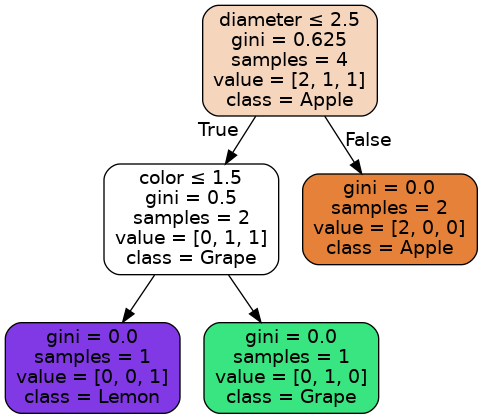

In [62]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Apple','Grape', 'Lemon'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('fruit.png')
Image(graph.create_png())